<a href="https://colab.research.google.com/github/AdelineWang28/NTD_Predictor/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uloaded = files.upload()

Saving Nigeria_Dataset.csv to Nigeria_Dataset.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Nigeria_Dataset.csv')
df.head(10)

,Unnamed: 0,year,T2M_JAN,T2M_MAX_JAN,T2M_FEB,T2M_MAX_FEB,T2M_MAR,T2M_MAX_MAR,T2M_APR,T2M_MAX_APR,...,mar_precip,apr_precip,may_precip,jun_precip,jul_precip,aug_precip,sep_precip,oct_precip,nov_precip,dec_precip
0,0,2014,0.743126,0.250396,0.650224,0.201982,0.281837,0.146053,0.257391,0.136338,...,0.639223,0.681672,0.716883,0.667124,0.487199,0.677635,0.608715,0.830772,0.690276,0.000000
1,1,2015,0.605656,0.351030,0.659940,0.182165,0.303758,0.214419,0.280870,0.161438,...,0.748454,0.610672,0.706783,0.750189,0.585698,0.617988,0.650218,0.886070,0.849354,0.000000
2,2,2016,0.673213,0.345483,0.680120,0.301067,0.373695,0.206339,0.329565,0.196235,...,0.776746,0.677131,0.737914,0.754915,0.619976,0.823487,0.696281,0.941047,0.739931,0.537839
3,3,2017,0.743126,0.277338,0.637519,0.165396,0.327766,0.212554,0.290435,0.220764,...,0.744355,0.732117,0.746727,0.780599,0.726272,0.757979,0.703526,0.942392,0.735753,0.343135
4,4,2018,0.636292,0.278922,0.679372,0.253811,0.290188,0.178372,0.256522,0.156874,...,0.710561,0.638604,0.707662,0.856546,0.634608,0.736739,0.650218,0.886070,0.826405,0.157873
5,5,2019,0.751767,0.339144,0.626308,0.178354,0.316284,0.201989,0.330435,0.188819,...,0.631239,0.513732,0.746122,0.777870,0.645067,0.792610,0.715349,0.928137,0.906709,0.429667
6,6,2020,0.666929,0.396989,0.638266,0.223323,0.359081,0.244251,0.299130,0.203651,...,0.792698,0.700024,0.753162,0.782208,0.677261,0.606888,0.816836,0.837740,0.825388,0.576507
7,7,2021,0.779262,0.325674,0.645740,0.185976,0.286013,0.173400,0.292174,0.198517,...,0.680226,0.749875,0.763923,0.762627,0.582450,0.774965,0.593620,0.911756,0.877389,0.576507
8,8,2022,0.656716,0.283677,0.577728,0.204268,0.339248,0.215040,0.273043,0.315459,...,0.662550,0.736185,0.722358,0.716537,0.559270,0.716004,0.726953,0.833434,0.735753,0.576507
9,9,2023,0.709348,0.290016,0.628550,0.240854,0.267223,0.188316,0.291304,0.176269,...,0.735680,0.666160,0.670319,0.803682,0.655704,0.496399,0.671709,0.859984,0.743975,0.242799


In [11]:
#define label
df['outbreak_indicator'] = (
    (df['mar_precip'] > 0.7) & (df['apr_precip'] > 0.7)
).astype(int)

y = df['outbreak_indicator']


In [12]:
#input 36 features
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

t2m = [f'T2M_{m}' for m in months]
t2m_max = [f'T2M_MAX_{m}' for m in months]
precip = [f'{m.lower()}_precip' for m in months]

features = t2m + t2m_max + precip
X = df[features]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    eval_metric='logloss'
)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[932 241]
 [103 272]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1173
           1       0.53      0.73      0.61       375

    accuracy                           0.78      1548
   macro avg       0.72      0.76      0.73      1548
weighted avg       0.81      0.78      0.79      1548



In [15]:
# adjust parametre to improve precision, optimize precision to reduce error report
# GridSearchCV adjust paramter
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.2, 0.4],
    'scale_pos_weight': [ (y_train == 0).sum() / (y_train == 1).sum() ]
}

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    eval_metric='logloss'
)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='precision',  # 优先提高精度
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.2, 0.4], 'max_depth': [3, 5, 7],
                         'min_child_weight': [1, 3, 5],
                         'scale_pos_weight': [np.float64(3.1335113484646193)]},
             scoring='precision', verbose=1)

In [16]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Best Parameter：", grid_search.best_params_)
print("Confusion matrix：\n", confusion_matrix(y_test, y_pred_best))
print("\nClassfication Report：\n", classification_report(y_test, y_pred_best))


Best Parameter： {'gamma': 0.2, 'max_depth': 7, 'min_child_weight': 3, 'scale_pos_weight': np.float64(3.1335113484646193)}
Confusion matrix：
 [[935 238]
 [100 275]]

Classfication Report：
               precision    recall  f1-score   support

           0       0.90      0.80      0.85      1173
           1       0.54      0.73      0.62       375

    accuracy                           0.78      1548
   macro avg       0.72      0.77      0.73      1548
weighted avg       0.81      0.78      0.79      1548



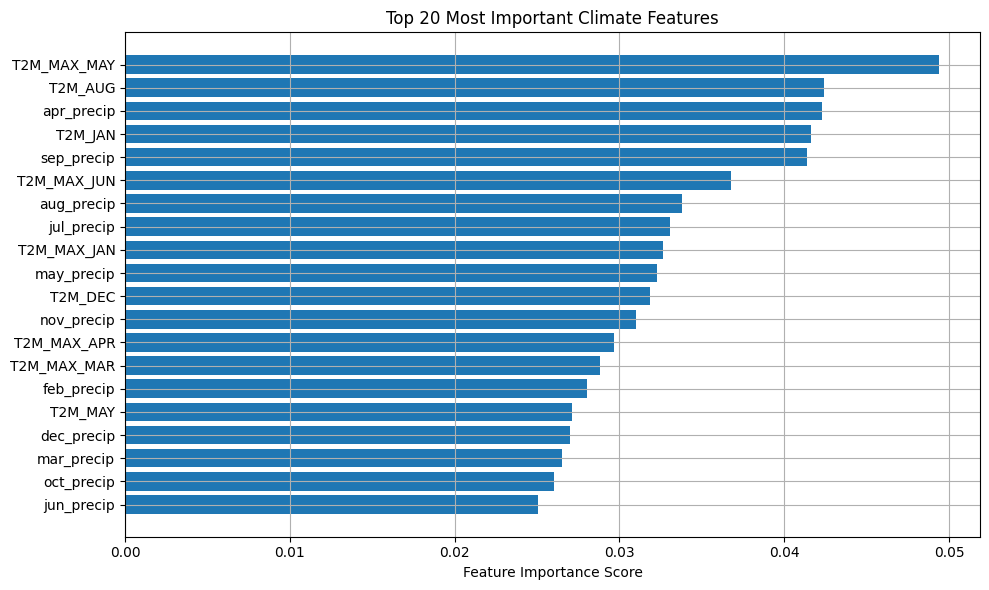

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# get importance of feature
importances = best_model.feature_importances_
feature_names = X.columns

# order them
sorted_idx = np.argsort(importances)[::-1]
top_n = 20  # show top 20 features

# draw histrogram
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances[sorted_idx[:top_n]][::-1], align='center')
plt.yticks(range(top_n), feature_names[sorted_idx[:top_n]][::-1])
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Most Important Climate Features')
plt.grid(True)
plt.tight_layout()
plt.show()
